# Первые графики и выводы

Продолжаем разговор о виртуализации данных.

Аналитик должен представлять себе гистограмму ожидаемого вида, чтобы знать, когда стоит насторожиться. Для некоторых явлений можно выяснить все возможные значения и описать частоту их появления — это называется распределение.
Отвлекитесь от задачи про АЗС и пофантазируйте. Представьте два игральных кубика с шестью гранями. Мысленно подбросьте их пару.

Единственная комбинация, дающая 12 очков в сумме — это две шестёрки. А 8 можно получить разными способами: 2 и 6; 3 и 5; 4 и 4. Из-за того, что таких наборов больше, получить восьмёрку более вероятно, чем 12. Напишем функцию в Python, она выдаст все возможные комбинации с их частотой, по ним построим гистограмму.

Для генерации случайных чисел в Python вызывают библиотеку **random** (англ. «случайный»):

**import random**

Функция **random.randint()** (от англ. random integer, «случайное целое число») возвращает случайные целые числа. Она принимает два аргумента: самое маленькое и самое большое допустимое число. Посмотрим, как она работает:

In [1]:
import random
print(random.randint(1, 5))
print(random.randint(1, 5))
print(random.randint(1, 5))

2
3
2


Распечатанные результаты работы функции выдали нам пять случайных чисел от 1 до 5. Однако вернёмся к кубикам. Эта же функция для диапазона от 1 до 6 будет имитировать результат броска кубика.  Напишем функцию, возвращающую случайное число точек на верхней грани:

In [2]:
# от англ. dice - кубик, roll - бросок
def dice_roll():
    score = random.randint(1, 6)
    return score
print(dice_roll())
print(dice_roll())
print(dice_roll()) 


1
4
5


У нас пара кубиков. Значит, нужна функция, получающая количество очков от броска двух кубиков.

In [3]:
# от англ. double - двойной, roll - бросок, score - очки
def double_roll_score():
    first = dice_roll()
    second = dice_roll()
    score = first + second
    return score


print(double_roll_score())
print(double_roll_score())
print(double_roll_score()) 


6
7
9


Сделаем 1000 таких бросков и построим гистограмму полученных очков:

array([[<Axes: title={'center': '0'}>]], dtype=object)

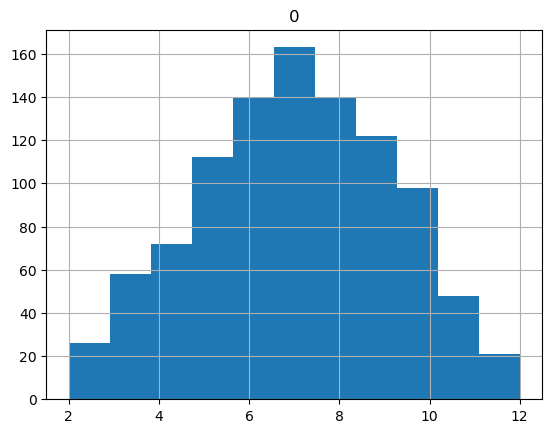

In [4]:
import pandas as pd
# Cоздаём пустой список. В него мы
# будем складывать результаты экспериментов.
experiments = []
for i in range(1000):
        score = double_roll_score()
        # Напомним: функция append() добавляет новый
        # элемент score в конец списка experiments.
        experiments.append(score)

df_experiments = pd.DataFrame(experiments)
df_experiments.hist(bins=11, range=(2, 12)) 


Интересно, такая гистограмма описывает только броски кубиков или характерна для других явлений?

Будем бросать на стол 10 монет и считать количество выпавших орлов. Функции для имитации одного броска и подсчёта числа орлов в нескольких бросках уже в прекоде. Мы повторили эксперимент 1000 раз и сохранили результат в переменной df_experiments.
Построим гистограмму полученных полученных значений с диапазоном значений от 0 до 10 и количеством корзин 11.

array([[<Axes: title={'center': '0'}>]], dtype=object)

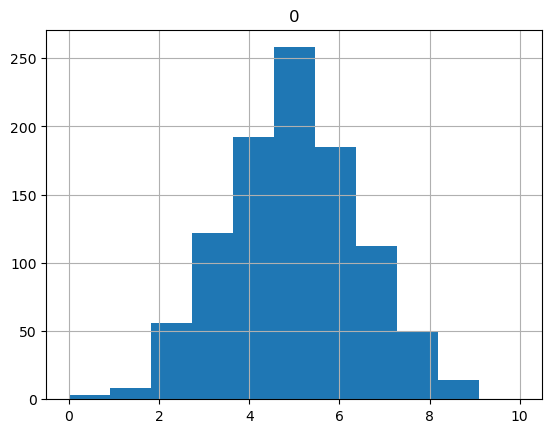

In [5]:
# Функция, имитирующая один бросок монеты.
# От англ. coin - монета, flip - бросок монеты.
def coin_flip():
    # возможны два варианта:
    # - выпала решка, это +0 орлов
    # - выпал орёл, это +1 орёл
    score = random.randint(0, 1)
    return score


# Функция для суммирования числа орлов в нескольких бросках.
# Орёл и решка переводятся на английский как heads и tails.
# Аргумент repeat говорит, сколько раз бросать монету
# (от англ. repeat - повторение).
def flips_heads(repeat):
    total = 0
    for i in range(repeat):
        flip = coin_flip()
        total += flip
    return total


# Cоздаём пустой список. В него мы
# будем складывать результаты экспериментов.
experiments = []

for i in range(1000):
    score = flips_heads(10)

    # Напомним: функция append() добавляет новый
    # элемент score в конец списка experiments.
    experiments.append(score)

# превращаем список в DataFrame
df_experiments = pd.DataFrame(experiments)
df_experiments.hist(bins=11, range=(0, 10)) 


## Распределения

Взгляните ещё раз на гистограммы кубиков и орлов. Наиболее частые (типичные, нормальные) значения оказываются посередине. А редкие — по краям. График симметричен и напоминает колокол. Такое распределение называется **нормальное**.
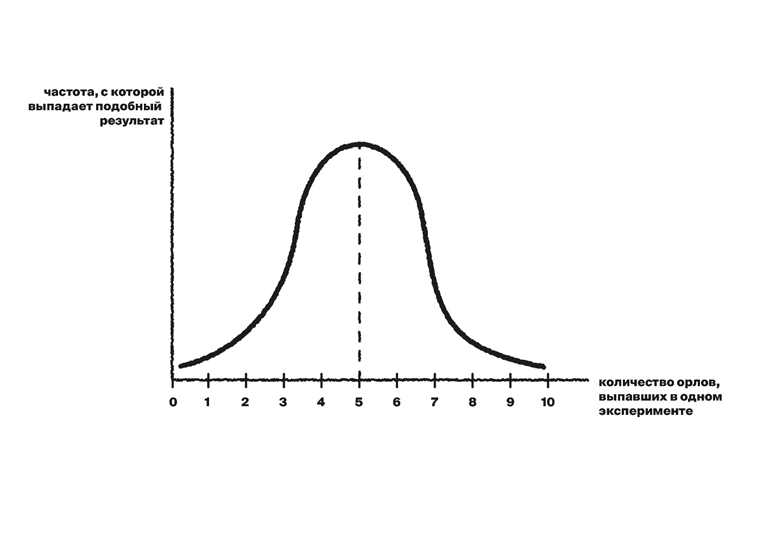

Нормальные или тяготеющие к ним распределения распространены в жизни. Так распределяется рост людей, размер яблок, результаты измерения температуры. Понимание природы распределений необходимо для обнаружения важных аномалий.

Так, измеряя длину изготовленных на заводе деталей, мы ожидаем распределение, тяготеющее к нормальному. Если же в результате расчётов получили распределение, скажем, с двумя пиками, это должно насторожить аналитика. Такое может быть, если на заводе есть две производственные линии, и с одной из них приходят данные в сантиметрах, а с другой — в метрах.

В общем случае любое отклонение от ожидаемого распределения — это сигнал, что данные не в порядке.
Ещё одно распределение, которое часто встречается — распределение Пуассона. Оно описывает число событий в единицу времени.

Например, в среднем в магазин заходит 2 человека в минуту. Но это не значит, что каждую минуту заходит ровно 2 человека. Может, в эту минуту не зайдёт ни одного, а через минуту зайдёт 5. Если каждый посетитель заходит случайным образом, независимо от других — это и есть распределение Пуассона:
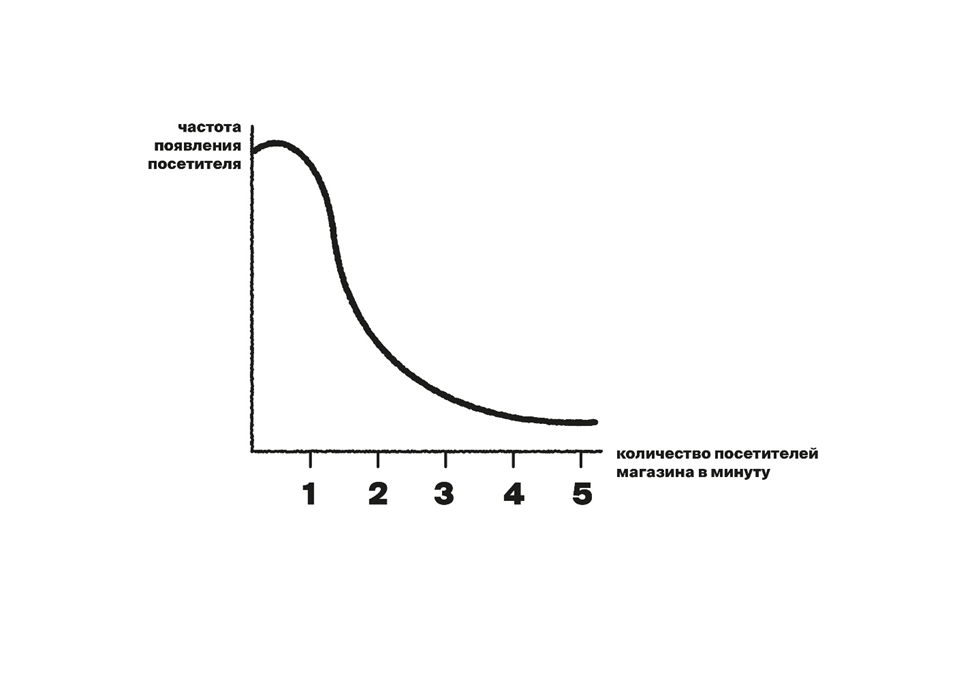

Форма распределения Пуассона зависит от числа событий. При небольших значениях распределение смещено влево, а с увеличением числа событий становится симметричным и уходит вправо.

## Диаграмма размаха
Вспомним распределение времени на АЗС, которое мы получили на прошлом занятии.


<Axes: >

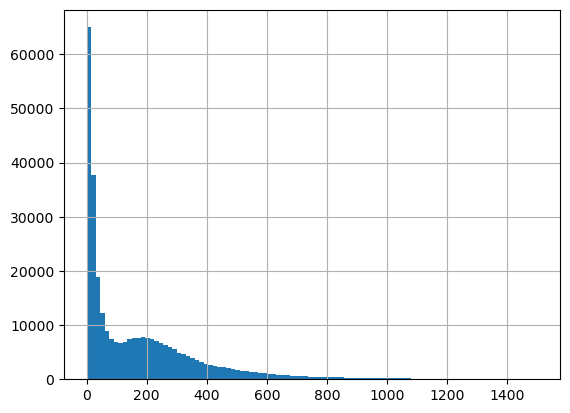

In [6]:
import pandas as pd
data = pd.read_csv('visits.csv', sep = '\t')
#data.info()
data['time_spent'].hist(bins=100, range=(0, 1500))

Ожидаемое распределение времени заправки — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого времени заправки. Однако на графике виден высокий пик около 0. Скорее всего, он имеет иную природу. Это не заправки, а ошибки расчётов, проезды сквозь АЗС или что-то ещё.

Описывая распределение, аналитики рассчитывают среднее арифметическое или медиану. С соответствующими методами **mean()** и **median()** вы познакомились в курсе по предобработке данных. Однако помимо медианы и среднего, важно знать характерный разброс — то, какие значения оказались вдали от среднего, и насколько их много.

Самое простое, что можно посчитать для оценки разброса — это минимальное и максимальное значения. Такое описание не всегда точно, подвержено влиянию выбросов. Гораздо более устойчивая оценка — **межквартильный размах**.

Квартили (от латинского quartus — «четвёртый») разбивают упорядоченный набор данных на четыре части. Первый квартиль Q1 — число, отделяющее первую четверть выборки: 25% элементов меньше, а 75% — больше него. Медиана — второй квартиль Q2, половина элементов больше и половина меньше неё. Третий квартиль Q3 — это отсечка трёх четвертей: 75% элементов меньше и 25% элементов больше него. Межквартильный размах — это расстояние между Q1 и Q3.
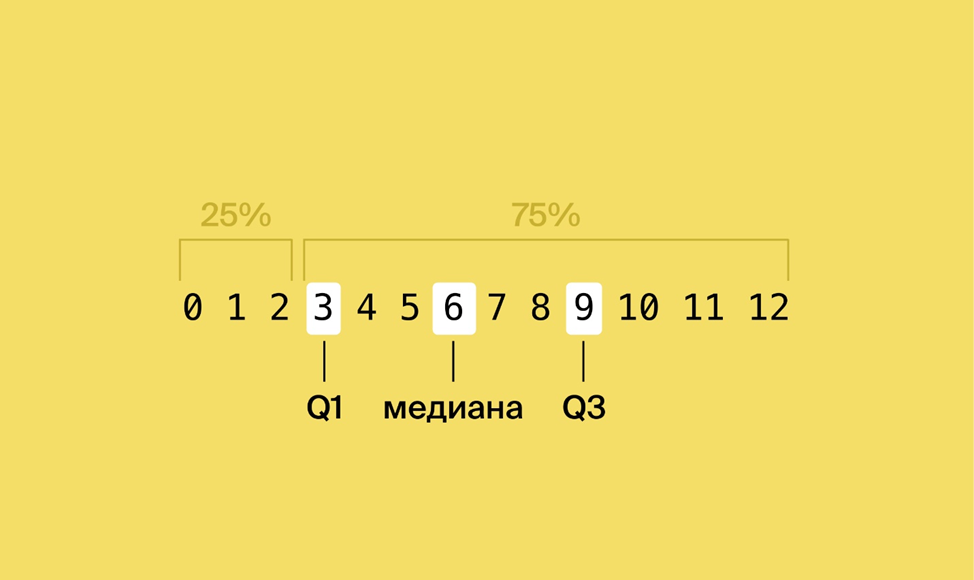


Увидеть медиану и квартили в Python можно на специальном графике. Его называют диаграмма размаха или ящик с усами.
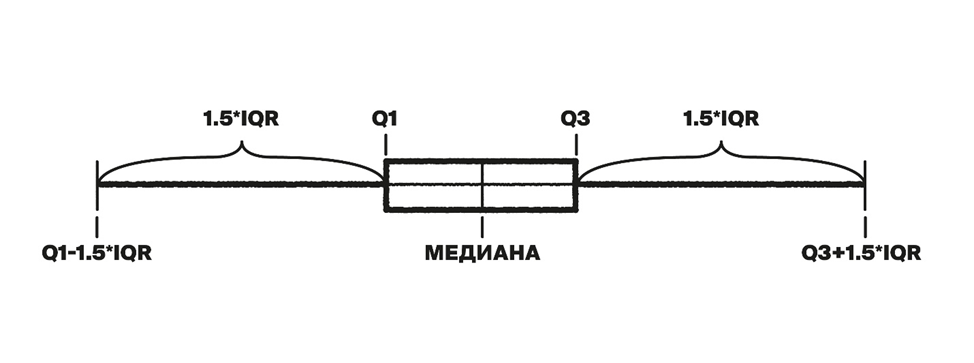
«Ящик» ограничен первым и третьим квартилями. Внутри ящика обозначают медиану.

«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильным размахам (сокращённо IQR, от англ. interquartile range, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. 
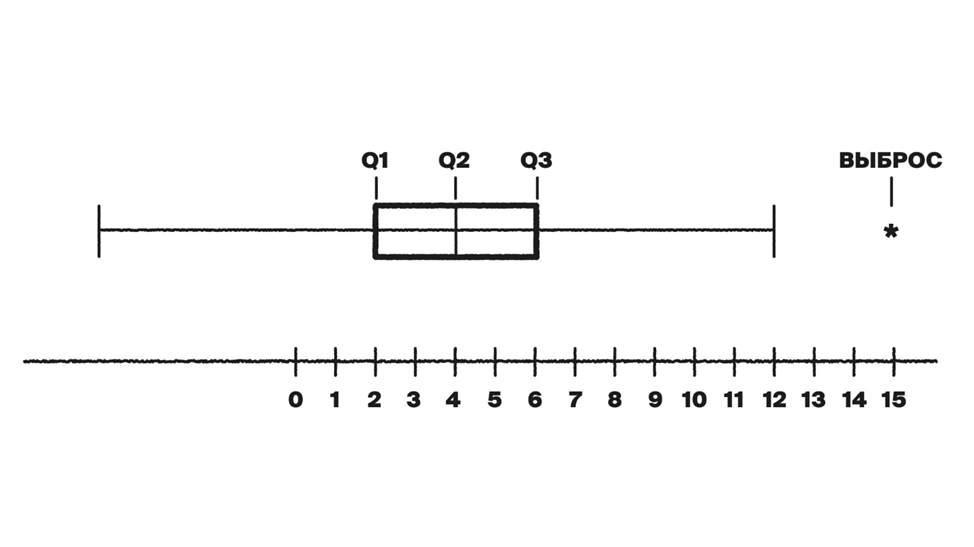

## Диаграмма размаха в Python
В Python диаграмму размаха строят методом **boxplot()** (от англ. box and whisker plot — «ящик с усами»).
Посмотрим, как выглядит график для данных задачи про АЗС:

<Axes: >

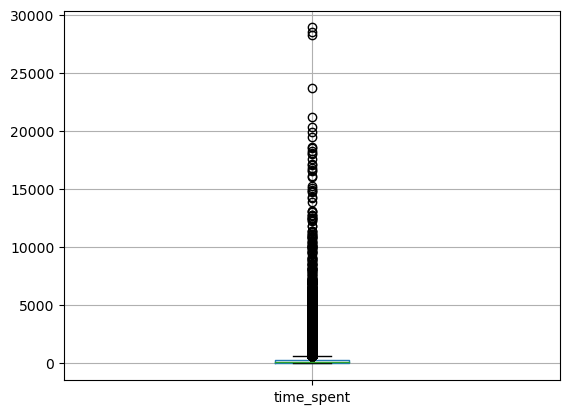

In [7]:
data.boxplot() 

Для продвинутой работы с графиками (в том числе гистограммами), импортируют библиотеку **matplotlib** (от англ. math — «математический», **plot** — «график, диаграмма», **library** — «библиотека»).

Желая построить график, обращаются к методам Pandas, а он, в свою очередь, передаёт данные **matplotlib**. Pandas при вызове функций рисования возвращает оси графика. Ими можно управлять, задавая ограничения на оси абсцисс (x) и оси ординат (y). 

Применим метод **ylim(y_min, y_max)** (от англ. y-limits, «пределы по оси ординат») для изменения масштаба по вертикальной оси. Если требуется поменять масштаб по горизонтальной оси, вызывают метод **xlim (x_min, x_max)** (от англ. х-limits, «пределы по оси абсцисс»). Оба метода имеют 2 аргумента: минимальное и максимальное желаемое значение для графика; а сам метод вызывают из библиотеки **plt**:

(0.0, 200.0)

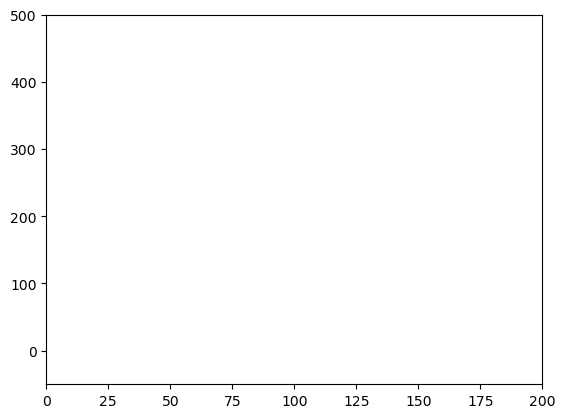

In [8]:
import matplotlib.pyplot as plt 

plt.ylim(-50, 500)
plt.xlim(0, 200) 


### Задача 1
**boxplot()** позволяет визуально оценить характеристики распределения, не прибегая к гистограмме. Удобно, когда нужно сравнить разные выборки.
Нарисуйте диаграмму размаха для **data**, ограничив диапазон по вертикали значениями -100 и 1000.


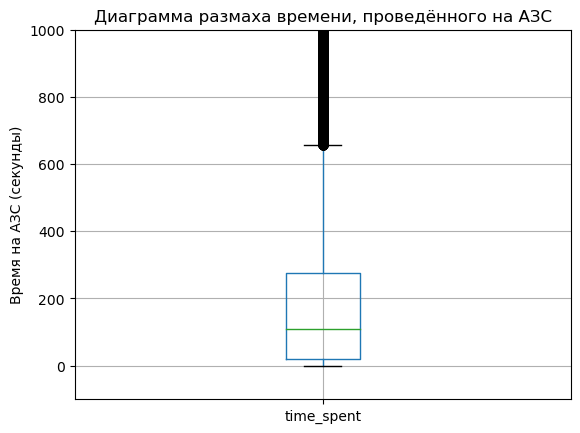

In [9]:
# Построение диаграммы размаха
data.boxplot(column='time_spent')

# Ограничение диапазона по вертикальной оси от -100 до 1000
plt.ylim(-100, 1000)

# Добавление заголовков и подписей осей
plt.title('Диаграмма размаха времени, проведённого на АЗС')
plt.ylabel('Время на АЗС (секунды)')

# Отображение графика
plt.show()


## Описание данных

Внимательно изучите усы.
Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 650 секунд — это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов у нас очень много.

И всё же значения, которые отсёк верхний «ус» — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

Заметные на гистограмме нюансы распределения хорошо бы зафиксировать в числах: иметь под рукой среднее, медиану, количество наблюдений в выборке и разброс их значений. Такие характеристики, дающие представление о выборке, входят в числовое описание данных. В Python его получают методом **describe()** (англ. «описать, охарактеризовать»). Результат отработки метода — список характерных значений:
 
count -  количество наблюдений в наборе данных
mean - среднее арифметическое
std -  стандартное отклонение
min -  минимальное значение
25% -  первый квартиль
50% -  медиана или второй квартиль
75% - третий квартиль
max -  максимальное значение


In [10]:
print(data.describe()) 

          time_spent
count  317104.000000
mean      203.382294
std       395.754791
min         0.000000
25%        19.000000
50%       108.000000
75%       274.000000
max     28925.000000


Описание данных может быть не только дополнением к графикам, но и самодостаточной боевой единицей первичного анализа. Если в данных много столбцов, или нужно сравнить несколько выборок, аналитики обращаются к числовому описанию, а не к графикам.

Стандартное отклонение — единственное значение, которого мы ещё не касались. Оно характеризует разброс величин, показывает, насколько значения в выборке отличаются от среднего арифметического.
Бывает, что именно стандартное отклонение позволяет понять природу распределения и определить, насколько значения однородны. Выборка, где все значения близки к среднему, будет охарактеризована малым стандартным отклонением. Если же стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы.


# Срезы данных методом query()

Вы уже знаете, как получить общее представление о данных. Пора научиться разбираться в деталях. Откуда взялись короткие заезды на АЗС? А очень долгие? Это характерно для одной АЗС или всех? Отличаются ли чем-то АЗС со сверхдолгими заправками от других?

Это гибкий инструмент получения срезов и владеть им полезно. Однако существует и более простой способ — метод **query()** (англ. «запрос»).

Необходимое условие для среза записывается в строке, которую передают как аргумент методу query(). А его применяют к датафрейму. В результате получаем нужный срез.

Вот для примера датафрейм с информацией об авиабилетах. Указаны пункт вылета **('From')** и прилёта **('To')**, наличие багажа **('Has_luggage')**, прямой ли рейс **('Is_Direct')**, цена билета туда-обратно **('Price')**, дата вылета **('Date_From')** и прилёта **('Date_To')**, название авиалиний **('Airline')**, время в пути в минутах туда **('Travel_time_from')** и обратно **('Travel_time_to')**.


In [11]:
df = pd.DataFrame(
    {
        'From': [
            'Moscow',
            'Moscow',
            'St. Petersburg',
            'St. Petersburg',
            'St. Petersburg',
        ],
        'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
        'Is_Direct': [False, True, False, False, True],
        'Has_luggage': [True, False, False, True, False],
        'Price': [21032, 19250, 19301, 20168, 31425],
        'Date_From': [
            '01.07.19',
            '01.07.19',
            '04.07.2019',
            '03.07.2019',
            '05.07.2019',
        ],
        'Date_To': [
            '07.07.19',
            '07.07.19',
            '10.07.2019',
            '09.07.2019',
            '11.07.2019',
        ],
        'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
        'Travel_time_from': [995, 230, 605, 365, 255],
        'Travel_time_to': [350, 225, 720, 355, 250],
    }
)
print(df)
 


             From         To  Is_Direct  Has_luggage  Price   Date_From  \
0          Moscow       Rome      False         True  21032    01.07.19   
1          Moscow       Rome       True        False  19250    01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.2019   
3  St. Petersburg  Barcelona      False         True  20168  03.07.2019   
4  St. Petersburg  Barcelona       True        False  31425  05.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
0    07.07.19  Belavia               995             350  
1    07.07.19       S7               230             225  
2  10.07.2019  Finnair               605             720  
3  09.07.2019    Swiss               365             355  
4  11.07.2019  Rossiya               255             250  


Посмотрим информацию о рейсах на Барселону

In [12]:
df.query('To == "Barcelona"')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


Условия, указанные в параметре **query()**:

•	поддерживают разные операции сравнения: !=, >, >=, <, <=

•	проверяют, входят ли конкретные значения в список, конструкцией: **Date_To in ("07.07.19", "09.07.2019")**. Если нужно узнать, нет ли в списке определённых значений, пишут так: **Date_To not in ("07.07.19", "09.07.2019")**.

•	работают с логическими операторами в привычном виде, где «или» — or , «и» — and, «не» — not. Указывать условия в скобках необязательно. Без скобок операции выполняются в следующем порядке: сначала not, потом and и, наконец, or.

Обратите внимание, что значение "Barcelona" в коде задачи заключено в двойные кавычки. Это нужно, чтобы различать одинарные кавычки, оформляющие строку, и кавычки для элемента "Barcelona".

Условия для среза данных можно объединять. Например, чтобы отыскать прямые рейсы или билеты с включённым в стоимость багажом — мало кому нравится летать со множеством пересадок, да ещё и без вещей.


In [13]:
df.query('Is_Direct == True or Has_luggage == True')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


## Возможности query()
Кроме объединения условий, в **query()** можно проводить математические операции:


In [14]:
df.query('Travel_time_from < 2 * Travel_time_to ') 

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


И даже вызывать методы:

In [15]:
df.query('Travel_time_from < Travel_time_to.mean()') 

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


Ещё в **query()** можно включать внешние переменные (не из датафрейма). Когда упоминаете такую переменную, помечайте её знаком @:

In [16]:
maximum_price = 20000
df.query('Price <= @maximum_price') 


,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720


### Задача 2   
1.Выберите строки, где: Has_luggage равно False и Airline не равно ни S7, ни Rossiya. Напечатайте полученную выборку на экране.

In [17]:
# Используем метод query для выбора строк, где Has_luggage == False и Airline не равно ни "S7", ни "Rossiya"
df.query('Has_luggage == False and Airline not in ["S7", "Rossiya"]')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720


### Задача 3 
Выберите строки, где Airline равно "Belavia", "S7" или "Rossiya", при этом 'Travel_time_from' меньше переменной под названием max_time. Напечатайте полученную выборку на экране.

In [18]:
# Определяем переменную max_time
max_time = 300

# Используем метод query для фильтрации по условиям
df.query('Airline in ["Belavia", "S7", "Rossiya"] and Travel_time_from < @max_time')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


# Срезы в действии

Наконец-то вы готовы строить срезы на практике.
Вспомним, как выглядела диаграмма размаха времени заезда на АЗС:


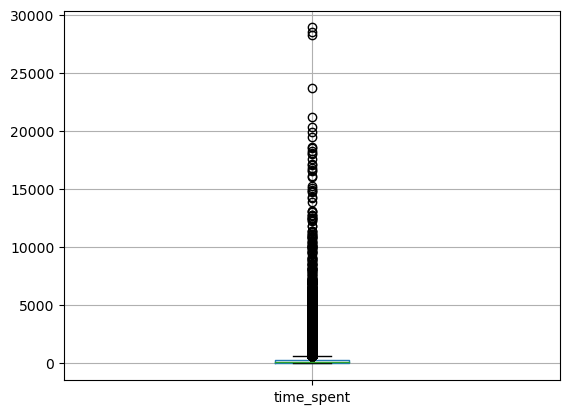

In [19]:
data.boxplot();

Есть несколько заездов со временем около 30 000 секунд (это около 8 часов). Крайне маловероятно, что водители заправляются так долго. Они повстречали свою любовь или случайно вырвали заправочный пистолет? А может, всё одновременно?

У вас есть всё необходимое, чтобы с этим разобраться.

Чтобы построить графики, обращаются к библиотеке **matplotlib** (от англ. mathematical plotting library, «библиотека математических построений»). Точнее к её модулю — **pyplot:**


In [20]:
import matplotlib.pyplot as plt 

Для простейших графиков импортировать её не обязательно. Однако вызов библиотеки может помочь, когда вывод графиков нужно разделить. После команды вывода графика вызывают метод **show()**. Он позволяет посмотреть, как отличаются гистограммы с разным числом корзин:

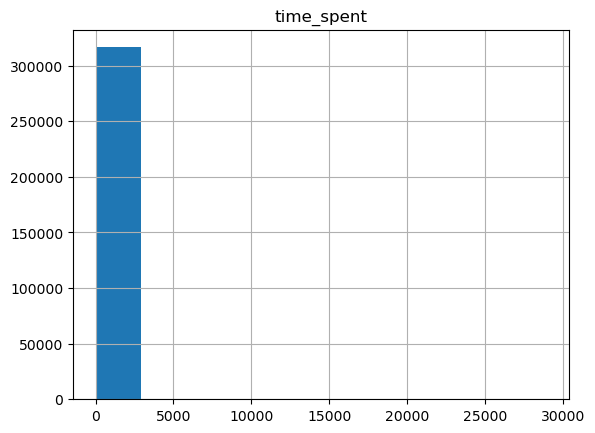

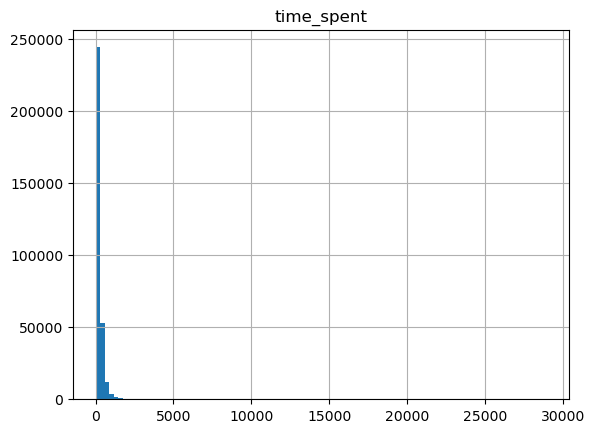

In [21]:
data.hist(bins=10)
plt.show()
data.hist(bins=100)
plt.show() 


### Задача 4
Узнайте, на каких АЗС водители проводят больше всего времени. Выведите топ-10 строк с самой долгой заправкой.


In [22]:
# Сортируем данные по времени заезда на заправке (time_spent) в порядке убывания и выводим топ-10
top_10_stations = data.sort_values(by='time_spent', ascending=False).head(10)
print(top_10_stations)


              date_time        id  time_spent      name
114797  20180402T055708  3c1e4c52     28925.0   Василек
27147   20180406T080254  4b5f2af5     28519.0   Немезия
60547   20180408T000002  cf1ba8a5     28292.0   Василек
19042   20180408T204208  5410e876     23696.0   Василек
118597  20180408T165020  3c1e4c52     21184.0   Василек
118058  20180402T111333  3c1e4c52     20359.0   Василек
114406  20180408T083722  3c1e4c52     19886.0   Василек
132164  20180405T160745  627ea5e3     19445.0    Левкой
281360  20180406T180459  d0c0928d     18614.0      Пион
165326  20180402T230204  3af3bb71     18569.0  Агератум


### Задача 5
Сохраните срез данных с id == "3c1e4c52" в переменной sample (англ. «выборка, проба»). Выведите количество заездов на эту АЗС.

In [23]:

# Сохраняем срез данных, где id == "3c1e4c52"
sample = data.query('id == "3c1e4c52"')

# Выводим количество заездов на эту АЗС
print(f"Количество заездов на АЗС с id '3c1e4c52': {sample.shape[0]}")


Количество заездов на АЗС с id '3c1e4c52': 5814


### Задача 6
Посмотрим, как они распределены, отличаются ли от остальных данных. Вспомните, как выглядела гистограмма по всему набору данных.
Постройте гистограмму времён заезда на все АЗС. И аналогичную гистограмму для выбранной АЗС (мы уже сохранили данные в переменную sample). Для обеих гистограмм задайте диапазон 0-1500 секунд и 100 корзин.


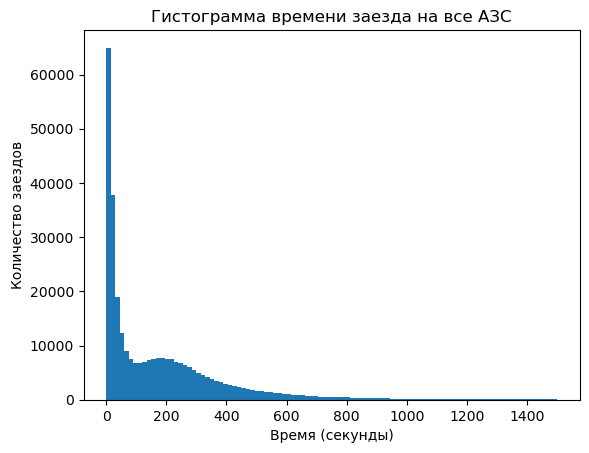

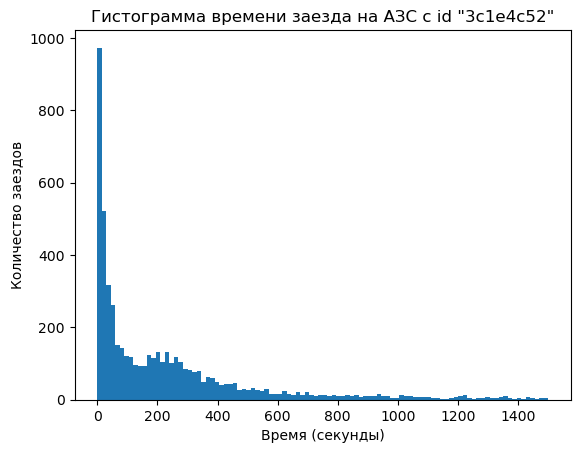

In [24]:
# Построение гистограммы для всех данных
plt.hist(data['time_spent'], bins=100, range=(0, 1500))
plt.title('Гистограмма времени заезда на все АЗС')
plt.xlabel('Время (секунды)')
plt.ylabel('Количество заездов')
plt.show()

# Построение гистограммы для выбранной АЗС (sample)
plt.hist(sample['time_spent'], bins=100, range=(0, 1500))
plt.title('Гистограмма времени заезда на АЗС с id "3c1e4c52"')
plt.xlabel('Время (секунды)')
plt.ylabel('Количество заездов')
plt.show()


## «Слишком долгая» заправка — это сколько?
Нетипично долгие заезды признаем выбросами и отбросим. Почему так можно?
Во-первых, их немного. Во-вторых, скорее всего, такие заезды — не заправки. Например, водитель мог отдыхать, есть или заниматься чем-то ещё. Раз это не заправки в чистом виде, значит в рамках нашего исследования такие заезды не интересны.
Как определить, что заправка «слишком долгая»? Где провести границу между заправкой автомобиля и прочими занятиями на АЗС?
Обратимся к гистограмме:
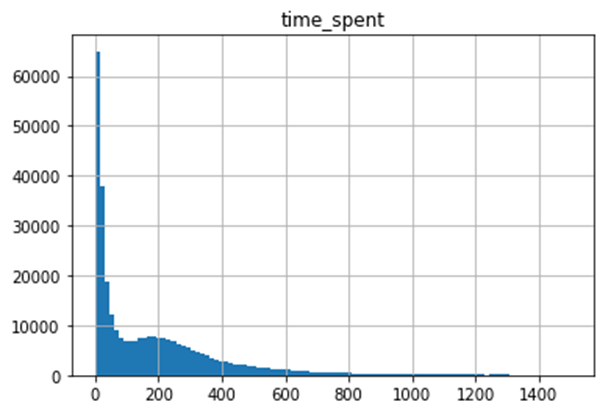

Заправки продолжительностью 600 секунд — уже редки. Дольше 800 секунд почти не заправляются. А на участке более 1300 секунд гистограмма сливается с нулём (это не значит, что там ровно 0, но таких заправок единицы).

Примем верхнюю границу в 1000 секунд. Это число кажется разумным: дольше заправляются редко. Отбросив значения больше 1000, мы не потеряем много данных. Да и вряд ли водители тратят на заправку больше 1000 секунд (16 минут).

Решено. Продолжаем работать с наблюдениями, удовлетворяющими условию: **data.query('time_spent < 1000')**



## Работа с датой и временем
Мы посчитали подозрительно долгие заправки выбросами. Но что делать с чрезвычайно короткими заправками? Изучим их подробнее. Узнаем, связана ли их продолжительность со временем заезда на АЗС.


In [25]:
data.head() 

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василек
1,20180404T173913,76144fb2,15.0,Василек
2,20180403T172824,76144fb2,220.0,Василек
3,20180407T070441,76144fb2,19.0,Василек
4,20180404T132049,76144fb2,14.0,Василек


В столбце **'date_time'** дата и время заезда. Из описания данных известно, что время заезда указали в часовом поясе UTC+0, в формате ISO. Значит, сначала идут год, месяц, день; затем буквенный разделитель даты и времени; часы, минуты и секунды.

Давайте познакомимся с методом **to_datetime()**, который переводит строки в даты. 

В аргументе **format метода to_datetime()** указывают специальные обозначения, порядок которых соответствует порядку чисел в строке с датой:

•	%d — день месяца (от 01 до 31)

•	%m — номер месяца (от 01 до 12)

•	%Y — четырёхзначный номер года (например, 2019)

•	Z или T — стандартный разделитель даты и времени

•	%H — номер часа в 24-часовом формате

•	%I — номер часа в 12-часовом формате

•	%M — минуты (от 00 до 59)

•	%S — секунды (от 00 до 59)

Пора научиться:

•	Округлять даты;

•	Добывать отдельные компоненты из дат, например, день недели;

•	«Сдвигать» даты в другие часовые пояса.

О том, что операции предстоит выполнять именно с датами, аналитик сообщает Pandas отдельно, через атрибут **dt** (от англ. **date time**). Атрибут **dt** указывает, что тип данных, к которым будут применены методы, — **datetime**. А значит, **Pandas** не примет их за строки или числа.

Чтобы округлить время, применяют метод **dt.round()** (англ. round, «округлять»). В качестве параметра ему передают строку с шагом округления в часах, днях, минутах или секундах:

•	'D' — day (от англ. «день»)

•	'H' — hour (от англ. «час»)

•	'min' или 'T' — minute (от англ. «минута»)

•	'S' — second (от англ. «секунда»)

Чаще всего округляют с шагом в один час:


In [26]:
import pandas as pd

df = pd.DataFrame({'time': ['11-03-01 17:34']})
df['time'] = pd.to_datetime(df['time'], format='%y-%m-%d %H:%M')
df['time_rounded'] = df['time'].dt.round('1H')  # округляем до ближайшего значения с шагом в один час
print(df['time_rounded']) 


0   2011-03-01 18:00:00
Name: time_rounded, dtype: datetime64[ns]


**dt.round()** округляет до ближайшего значения — не всегда получается в бóльшую сторону. Четверть шестого после округления методом **dt.round()** станет пятью часами:

In [27]:
df = pd.DataFrame({'time': ['11-03-01 17:15']})
df['time'] = pd.to_datetime(df['time'], format='%y-%m-%d %H:%M')
df['time_rounded'] = df['time'].dt.round('1H')  # округляем до ближайшего значения с шагом в один час
print(df['time_rounded']) 


0   2011-03-01 17:00:00
Name: time_rounded, dtype: datetime64[ns]


Чтобы быть уверенными в том, что время будет округлено к бóльшему значению, обращаются к методу **dt.ceil()** (от англ. ceiling — «потолок»). К меньшему значению, «вниз», округляют методом **dt.floor()** (англ. floor, «пол»).

In [28]:
df = pd.DataFrame({'time': ['11-03-01 17:15']})
df['time'] = pd.to_datetime(df['time'], format='%y-%m-%d %H:%M')
df['ceil'] = df['time'].dt.ceil('1H') # округляем к потолку
df['floor'] = df['time'].dt.floor('1H') # округляем к полу
print('Время, округлённое вверх', df['ceil'])
print('Время, округлённое вниз', df['floor']) 


Время, округлённое вверх 0   2011-03-01 18:00:00
Name: ceil, dtype: datetime64[ns]
Время, округлённое вниз 0   2011-03-01 17:00:00
Name: floor, dtype: datetime64[ns]


Номер дня в неделе находят методом **dt.weekday** (англ. weekday, «будний день»). Понедельник — день под номером 0, а воскресенье — шестой день.

In [29]:
df = pd.DataFrame({'time': ['11-03-07 17:15', '11-04-02 17:15']}) # пн и сб
df['time'] = pd.to_datetime(df['time'], format='%y-%m-%d %H:%M')
df['weekday'] = df['time'].dt.weekday
print(df['weekday']) 


0    0
1    5
Name: weekday, dtype: int32


Иногда нужно переводить время в другой часовой пояс. За временные сдвиги отвечает **pd.Timedelta()** (от англ. time delta — «дельта времени, перепад во времени»). Количество часов передают в параметре: **(hours=10)**.

Прибавим 9 часов к московскому времени и узнаем, который час был в Петропавловске-Камчатском, когда в Москве происходили события датафрейма.

Можно и наоборот: отнимать время, указав в параметре отрицательное количество часов.


In [30]:
df = pd.DataFrame({'time': ['11-03-07 17:15', '11-05-02 10:20']})
df['moscow_time'] = pd.to_datetime(df['time'], format='%y-%m-%d %H:%M')
df['petropavlovsk-kamchatsky_time'] = df['moscow_time'] + pd.Timedelta(hours=9)
print(df['petropavlovsk-kamchatsky_time']) 


0   2011-03-08 02:15:00
1   2011-05-02 19:20:00
Name: petropavlovsk-kamchatsky_time, dtype: datetime64[ns]


### Задача   7
Переведите значения в столбце **'date_time'** в формат даты.
В аргументе **format** метода **to_datetime()** передайте строку со значениями года, месяца, дня и времени, чтобы получить запись вида: 2018-04-06T16:53:58. Результат сохраните в столбце **'date_time'**.
Первые 5 строк таблицы data выведите на экран.


In [31]:
# Преобразуем столбец 'date_time' в формат даты
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y%m%dT%H%M%S')

# Выводим первые 5 строк
print(data.head())

            date_time        id  time_spent     name
0 2018-04-06 16:53:58  76144fb2        98.0  Василек
1 2018-04-04 17:39:13  76144fb2        15.0  Василек
2 2018-04-03 17:28:24  76144fb2       220.0  Василек
3 2018-04-07 07:04:41  76144fb2        19.0  Василек
4 2018-04-04 13:20:49  76144fb2        14.0  Василек


### Задача   8
Напомним, что в датафрейме записано время UTC. Московское рассчитывают как UTC + 3 часа.
Создайте столбец **data['local_time']** и сохраните в нём сдвинутую на +3 часа дату и время из столбца **data['date_time']**. Напечатайте первые 5 строк таблицы data.


In [32]:
# Добавляем 3 часа к времени UTC для получения московского времени
data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)

# Выводим первые 5 строк
print(data.head())


            date_time        id  time_spent     name          local_time
0 2018-04-06 16:53:58  76144fb2        98.0  Василек 2018-04-06 19:53:58
1 2018-04-04 17:39:13  76144fb2        15.0  Василек 2018-04-04 20:39:13
2 2018-04-03 17:28:24  76144fb2       220.0  Василек 2018-04-03 20:28:24
3 2018-04-07 07:04:41  76144fb2        19.0  Василек 2018-04-07 10:04:41
4 2018-04-04 13:20:49  76144fb2        14.0  Василек 2018-04-04 16:20:49


### Задача   9
Создайте столбец **data['date_hour']** с московским временем заезда на АЗС, округлённым до 1 часа методом dt.round(). Напечатайте первые 5 строк.

In [33]:
# Округляем московское время до 1 часа
data['date_hour'] = data['local_time'].dt.round('1H')

# Выводим первые 5 строк
print(data.head())


            date_time        id  time_spent     name          local_time  \
0 2018-04-06 16:53:58  76144fb2        98.0  Василек 2018-04-06 19:53:58   
1 2018-04-04 17:39:13  76144fb2        15.0  Василек 2018-04-04 20:39:13   
2 2018-04-03 17:28:24  76144fb2       220.0  Василек 2018-04-03 20:28:24   
3 2018-04-07 07:04:41  76144fb2        19.0  Василек 2018-04-07 10:04:41   
4 2018-04-04 13:20:49  76144fb2        14.0  Василек 2018-04-04 16:20:49   

            date_hour  
0 2018-04-06 20:00:00  
1 2018-04-04 21:00:00  
2 2018-04-03 20:00:00  
3 2018-04-07 10:00:00  
4 2018-04-04 16:00:00  
